# Apresentação
Este notebook calcula a diferenças entre duas quantidades de tempo delimitadas por anos, meses e dias.

Ex.:
(3 anos, 4 meses, 10 dias) - (1 ano, 2 meses, 19 dias) =
(2 anos, 1 mês, 21 dias)

Para isso, o usuário deve subir um arquivo excel, segundo as instruções abaixo, com a quantidades temporais que se desejam ser subtraídas.

# Instruções

1. Clique em "Copiar para o Drive" e logue no seu gmail se não estiver logado.
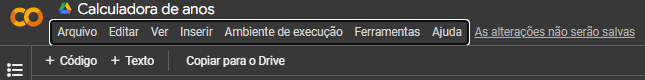

2. Faça o upload de um arquivo excel (xlsx) no seguinte lugar:
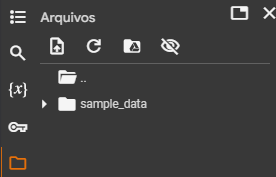

O arquivo deve se chamar dados_temporais.xlsx


E as colunas devem seguir esta exata ordem (não necessariamente com estes nomes): qtde de anos do tempo maior, qtde de meses do tempo maior, qtde de dias do tempo maior, qtde de anos do tempo menor, qtde de meses do tempo menor, qtde de dias do tempo menor.


3. Clique em executar tudo:

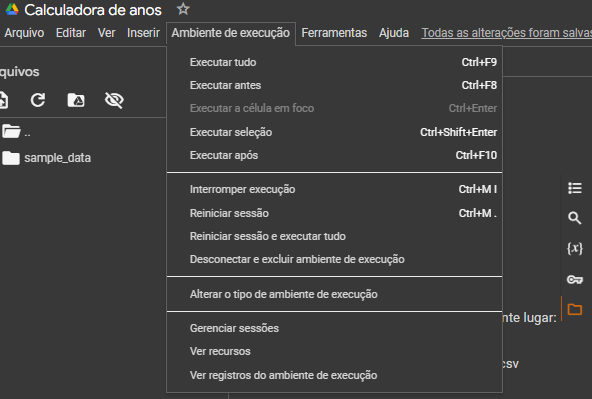

A diferenças de data vão ser impressas na tela, mas também estarão salvas num excel (xlsx) chamado dados_temporais_com_diferencas.xlsx, localizado no mesmo local onde foi feito o upload de arquivo.
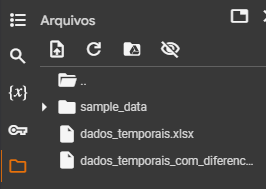

4. Você pode baixá-lo clicando nos três pontos ao lado do nome do arquivo:
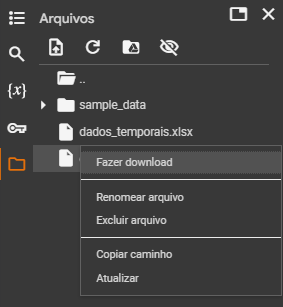

In [26]:
import pandas as pd
import numpy as np
class DateDiff:
  def __init__(self, major, minor):
    self.major = major
    self.minor = minor
  @staticmethod
  def date_format(date):
    """
    Formata objeto do tipo (ano, mês, dia)
    Ex. de retorno: 1 ano, 2 meses, 3 dias
    """
    ano = "ano" if date[0] <= 1 else "anos"
    mes = "mês" if date[1] <= 1 else "meses"
    dia = "dia" if date[2] <= 1 else "dias"
    return f"{date[0]} {ano}, {date[1]} {mes}, {date[2]} {dia}"
  def date_diff(self):
    """
    Calcula a diferença entre quantidades temporais
    """
    years = self.major[0] - self.minor[0]
    months = self.major[1] - self.minor[1]
    days = self.major[2] - self.minor[2]
    if days < 0:
        days += 30
        months -= 1
    if months < 0:
        months += 12
        years -= 1
    date = [years, months, days]
    return DateDiff.date_format(date)
def diff(row):
    major = (row[cols[0]], row[cols[1]], row[cols[2]])
    minor = (row[cols[3]], row[cols[4]], row[cols[5]])
    # Retorna o diferença já formatada
    return DateDiff(major, minor).date_diff()
def main():
  # Lê o arquivo Excel
  df = pd.read_excel('dados_temporais.xlsx')
  global cols
  cols = ["qtde de anos do tempo maior", "qtde de meses do tempo maior", "qtde de dias do tempo maior", "qtde de anos do tempo menor", "qtde de meses do tempo menor", "qtde de dias do tempo menor"]
  df.columns = cols
  # Certificando-se de que as colunas estão no tipo correto (np.int64)
  df[cols] = df[cols].apply(lambda col: pd.to_numeric(col, errors='coerce').fillna(0).astype(np.int64))
  # Aplica função diff a cada linha do DataFrame
  df['diferença'] = df.apply(diff, axis=1)
  # Salva o resultado em um novo arquivo Excel
  df.to_excel('dados_temporais_com_diferencas.xlsx', index=False)
  # Exibe o resultado na tela
  display(df)
main()

,qtde de anos do tempo maior,qtde de meses do tempo maior,qtde de dias do tempo maior,qtde de anos do tempo menor,qtde de meses do tempo menor,qtde de dias do tempo menor,diferença
0,3,4,10,1,2,19,"2 anos, 1 mês, 21 dias"
1,5,9,14,4,4,17,"1 ano, 4 meses, 27 dias"
